## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

2.435267857142857
2.169916892538265


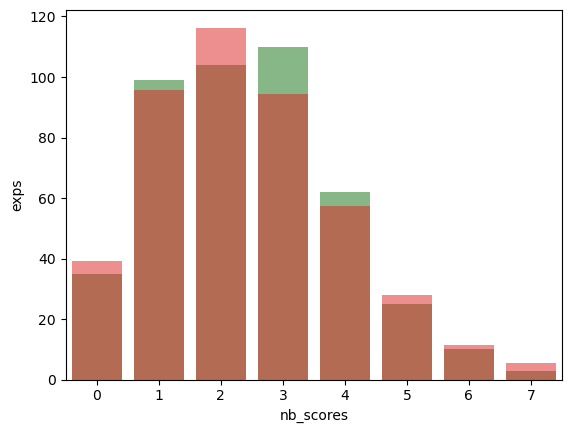

0.3705692339672493
P-value is above 0.05, so we should not reject the null hypothesis.


In [6]:
# your answer here
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

dct1 = {
    'nb_scores':[i for i in range(0,7+1)],
    'nb_times': [35,99,104,110,62,25,10,3]
}

data1 = pd.DataFrame(dct1)
lst = []

for i in range(len(data1)):
    lst.extend([data1.nb_scores[i]] * data1.nb_times[i])

sample1 = np.array(lst)
print(np.mean(sample1))
print(np.var(sample1))
probs1 = stats.poisson.pmf(data1.nb_scores[0:-1], np.mean(sample1))
exps1 = probs1 * data1.nb_times.sum()
exps1 = np.append(exps1, data1.nb_times.sum() - np.sum(exps1))
data1['exps'] = exps1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.barplot(data = data1, x = 'nb_scores', y = 'nb_times', ax = ax, color = 'green', alpha = 0.5)
sns.barplot(data = data1, x = 'nb_scores', y = 'exps', ax = ax, color = 'red', alpha = 0.5)
plt.show()
pval1 = stats.chisquare(f_obs = data1.nb_times, f_exp=data1.exps, ddof=1)[1]
print(pval1)
print("P-value is above 0.05, so we should not reject the null hypothesis.")

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [7]:
#your answer here
obs2 = [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]
print(np.mean(obs2))
pval2a = stats.ttest_1samp(obs2, 985)[1]
print(pval2a)
np.std(obs2)
df = len(obs2) - 1
test_stat = ( df * np.std(obs2)**2 ) / (50**2)
pval2b = stats.chi2.cdf(test_stat, df = df)
print(pval2b)
print("Both P-values are above 0.05, so we should not reject either null hypothesis.")

978.7333333333333
0.7059102752345553
0.8919140563821657
Both P-values are above 0.05, so we should not reject either null hypothesis.


## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [9]:
# your code here
dct3 = {
    'nb_defects':[0,1,3,4,5],
    'obs_freq': [32,15,9,4,0]
}

data3 = pd.DataFrame(dct3)
lst = []

for i in range(len(data3)):
    lst.extend([data3.nb_defects[i]] * data3.obs_freq[i])

sample3 = np.array(lst)
print(np.mean(sample3))
print(np.var(sample3))
probs3 = stats.poisson.pmf(data3.nb_defects[0:-1], np.mean(sample3))
exps3 = probs3 * data3.obs_freq.sum()
exps3 = np.append(exps3, data3.obs_freq.sum() - np.sum(exps3))
print(exps3)
data3['exp_freq'] = exps3
pval3 = stats.chisquare(f_obs = data3.obs_freq, f_exp=data3.exp_freq, ddof=1)[1]
print(pval3)
print("The P-value is below 0.05, so we should reject the null hypothesis.")


0.9666666666666667
1.7322222222222228
[22.8209254  22.06022788  3.43567623  0.83028842 10.85288207]
2.9431706468587253e-08
The P-value is below 0.05, so we should reject the null hypothesis.


## Question 4
A quality control engineer takes a simple of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

In [10]:
# your answer here
sample = np.random.binomial(n=10,p=0.05, size=200)
sample

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 3, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1,
       0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1])

## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

In [ ]:
#your answer here